In [8]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
from xgboost import XGBRegressor

In [16]:
!pip install --upgrade numpy scipy

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.6 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.8/12.6 MB 2.1 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.6 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.6 MB 2.0 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.6 MB 1.9 MB/s eta 0:00:06
   --------- ------------------------------ 3.1/12.6 MB 1.8 MB/s eta 0:00:06
   ---------- ----------------------------- 3.4/12.6 MB 1.8 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/12.6 MB 1.7 MB/s eta 0:00:06
   ------------ --------------------------- 3.9/12.6 MB 1.6 MB/s eta 0:00:06
   -------------- --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.


In [41]:
df = pd.read_csv('data/stud.csv')

In [23]:
from catboost import CatBoostRegressor

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [42]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [44]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57
...,...,...,...,...,...,...,...
106,female,group D,master's degree,standard,none,100,100
270,male,group C,bachelor's degree,standard,none,63,61
860,female,group C,associate's degree,standard,none,62,53
435,male,group C,some college,free/reduced,completed,48,53


In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns properly
cat_features = ['gender', 'lunch', 'test_preparation_course', 'race_ethnicity', 'parental_level_of_education']
num_features = ['reading_score', 'writing_score']

# Define transformers
oh_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Drop first category to avoid multicollinearity
scaler = StandardScaler()

# Apply transformations
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),  # Apply OHE to all categorical features
        ("StandardScaler", scaler, num_features)  # Scale numerical features
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Transform train & test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names
oh_columns = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)
all_columns = list(oh_columns) + num_features  # Add numerical column names

# Convert transformed arrays back to DataFrame
X_train = pd.DataFrame(X_train_transformed, columns=all_columns)
X_test = pd.DataFrame(X_test_transformed, columns=all_columns)


In [46]:
X_train

,gender_male,lunch_standard,test_preparation_course_none,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,reading_score,writing_score
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030791,0.434053
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.930290,0.964701
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.345443,1.163694
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.176786,-0.162925
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.384363,-0.759904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.106557,2.092328
796,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.453555,-0.494580
797,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.522747,-1.025228
798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.491438,-1.025228


In [ ]:

##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
from xgboost import XGBRegressor

In [50]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Adaboost regression":AdaBoostRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5719
- Mean Absolute Error: 4.4595
- R2 Score: 0.8623
-----------------------

In [51]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


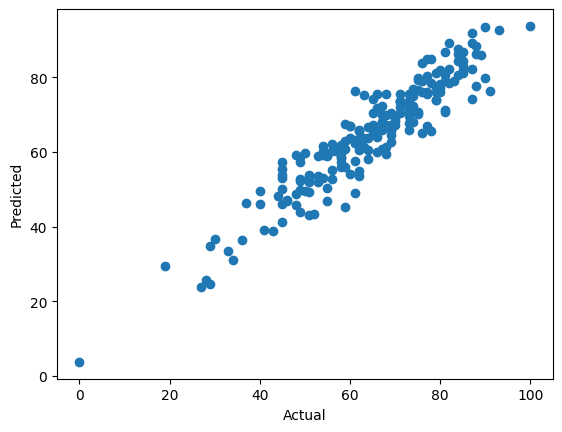

In [52]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

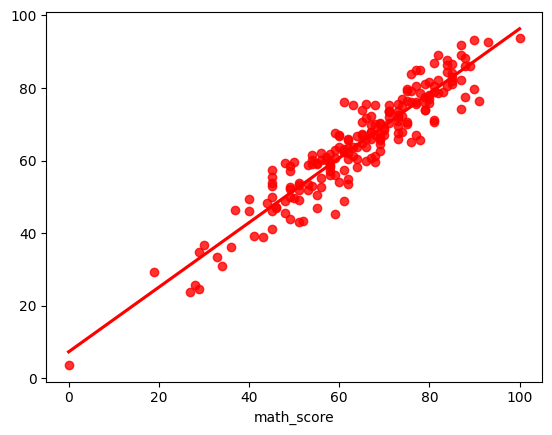

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [54]:
residuls=y_test-y_pred
residuls

521    14.612030
737    -5.885970
740     3.009735
660    -2.851804
411    -3.627378
         ...    
408     8.590851
332    -0.152214
208     6.111605
613    -2.022287
78     -1.345132
Name: math_score, Length: 200, dtype: float64

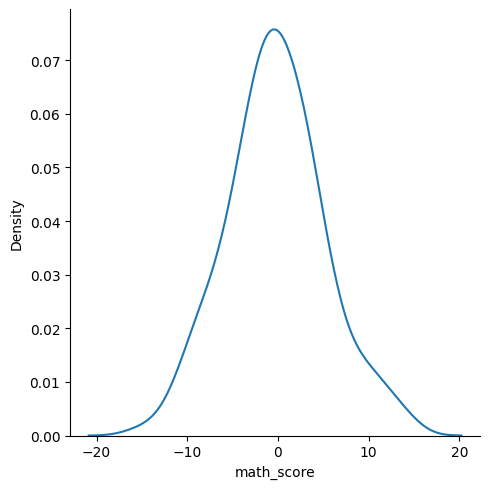

In [55]:
sns.displot(residuls,kind='kde')